<a href="https://colab.research.google.com/github/thapaliya123/Covid-19-Classification/blob/master/train_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#mount google drive

from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#import the necessary packages
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import argparse
import cv2
import os
import vis

FEATURES_PICKLE_FILE  = "/content/gdrive/My Drive/xray_image_classifiaction/features_datasets.pickle"
LABELS_PICKLE_FILE = "/content/gdrive/My Drive/xray_image_classifiaction/label_datasets.pickle"


#loading_datasets_stored_in_the _pickle_file
print("loading datasets stored in the pickle file")
features_datasets = pickle.load(open(FEATURES_PICKLE_FILE, "rb"))
label_datasets = pickle.load(open(LABELS_PICKLE_FILE, "rb"))
print("loaded datasets stored in the pickle  file")

# label_datasets = keras.utils.to_categorical(label_datasets, num_classes = 2, dtype='float32')

loading datasets stored in the pickle file
loaded datasets stored in the pickle  file


In [32]:
#splitting_the_loaded_datasets_for_trainin_and_testing

print("splitting the loaded datasets for training and testing")
(X_train, X_test, Y_train, Y_test) = train_test_split(features_datasets, label_datasets,
	test_size=0.20, stratify=label_datasets, random_state=42)
Y_train = keras.utils.to_categorical(Y_train, num_classes = 2, dtype='float32')
Y_test = keras.utils.to_categorical(Y_test, num_classes = 2, dtype='float32')
print("splitted the loaded datasets into training set and testing sets")


#visualizing_the_shape
print("visualizing the shapes")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


splitting the loaded datasets for training and testing
splitted the loaded datasets into training set and testing sets
visualizing the shapes
(40, 224, 224, 1)
(10, 224, 224, 1)
(40, 2)
(10, 2)


In [9]:
#normalizing_the_datasets
X_train = X_train/255.0
X_test = X_test/255.0
print("datasets normalized")

datasets normalized


In [12]:
from keras.layers import Convolution2D
from keras.layers import Convolution2D,Activation
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
#building_the_convoluional_neural_network

#adding_the_convolutional_layer
classifier = keras.Sequential()
classifier.add(keras.layers.Convolution2D(64, 3, 3, input_shape=(224, 224, 1), activation='relu'))

#adding_the_max_pooling_layer
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(keras.layers.Convolution2D(64, 2, 2, activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))





In [13]:
classifier.add(keras.layers.Flatten())

In [14]:
classifier.add(keras.layers.Dense(64, activation = "relu"))# kernel_regularizer=keras.regularizers.l2(0.1),
classifier.add(keras.layers.Dense(2, activation = "softmax"))


In [15]:

classifier.compile(keras.optimizers.Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
history = classifier.fit(X_train, Y_train,epochs=100, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 0s 107ms/step - loss: 0.7089 - accuracy: 0.3750 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 0.6737 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 0.6988 - accuracy: 0.5000 - val_loss: 0.6612 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 0.6560 - accuracy: 0.5000 - val_loss: 0.6200 - val_accuracy: 0.7000
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 0.6119 - accuracy: 0.7750 - val_loss: 0.5808 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.5648 - accuracy: 0.9750 - val_loss: 0.5283 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.5113 - accuracy: 0.9750 - val_loss: 0.4598 - val_accuracy: 1.0000
Epoch 8/100
2/2 [==

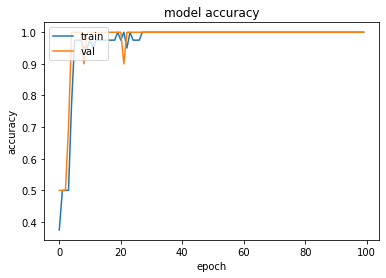

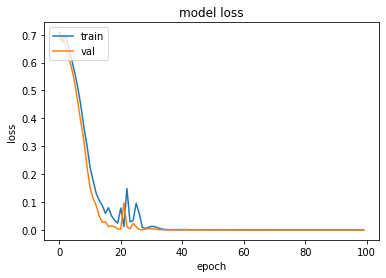

In [17]:
from matplotlib import pyplot as plt

#plotting_accuracy_and_loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
#saving_the_keras_models
MODEL_NAME = "covid__model.h5"

classifier.save(MODEL_NAME)

In [27]:
#loading_model
loaded_model = tf.keras.models.load_model(MODEL_NAME)

In [33]:
#Plotting confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

predictions = loaded_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
print("predictions", predictions)

Y_test = np.argmax(Y_test, axis=1)
print("Original", Y_test)
print(classification_report(Y_test, predictions))

#print confusion matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)

predictions [0 0 0 0 1 1 1 1 0 1]
Original [0 0 0 0 1 1 1 1 0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[5 0]
 [0 5]]


In [34]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

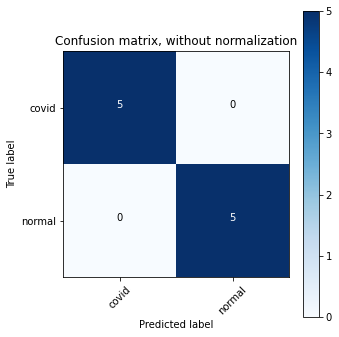

<Figure size 432x288 with 0 Axes>

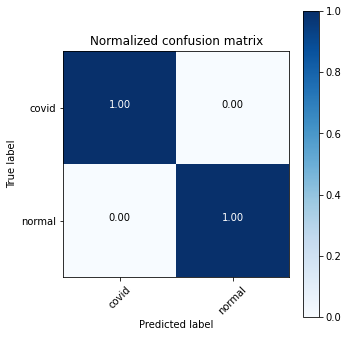

In [36]:
class_names = ["covid", "normal"]

# Compute confusion matrix
cnf_matrix = cm
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()